In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
import cv2
import pathlib
import os
import random
from skimage.io import imread
import horovod.tensorflow as hvd
hvd.init()

/Users/mattmann/git/buildout.python/python-3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/mattmann/git/buildout.python/python-3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/mattmann/git/buildout.python/python-3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/mat

In [2]:
def model_x(x, keep_prob=1.0):  #VGG-Face-Lite   
    #   
    # weights
    conv1_1_filter = tf.Variable(tf.random_normal(shape=[3, 3, 3, 64], mean=0, stddev=10e-2)) # third param is RGB, so 3
    conv1_2_filter = tf.Variable(tf.random_normal(shape=[3, 3, 64, 64], mean=0, stddev=10e-2)) 
    conv2_1_filter = tf.Variable(tf.random_normal(shape=[3, 3, 64, 128], mean=0, stddev=10e-2))
    conv2_2_filter = tf.Variable(tf.random_normal(shape=[3, 3, 128, 128], mean=0, stddev=10e-2))
    conv3_1_filter = tf.Variable(tf.random_normal(shape=[3, 3, 128, 256], mean=0, stddev=10e-2))
    conv3_2_filter = tf.Variable(tf.random_normal(shape=[3, 3, 256, 256], mean=0, stddev=10e-2))
    conv3_3_filter = tf.Variable(tf.random_normal(shape=[3, 3, 256, 256], mean=0, stddev=10e-2))
    conv4_1_filter = tf.Variable(tf.random_normal(shape=[3, 3, 256, 512], mean=0, stddev=10e-2))    
    conv4_2_filter = tf.Variable(tf.random_normal(shape=[3, 3, 512, 512], mean=0, stddev=10e-2))
    conv4_3_filter = tf.Variable(tf.random_normal(shape=[3, 3, 512, 512], mean=0, stddev=10e-2))
    conv5_1_filter = tf.Variable(tf.random_normal(shape=[3, 3, 512, 512], mean=0, stddev=10e-2))    
    conv5_2_filter = tf.Variable(tf.random_normal(shape=[3, 3, 512, 512], mean=0, stddev=10e-2))
    conv5_3_filter = tf.Variable(tf.random_normal(shape=[3, 3, 512, 512], mean=0, stddev=10e-2))

    # 1, 2, 3, 4, 5, 6
    conv1_1 = tf.nn.conv2d(x, conv1_1_filter, strides=[1,1,1,1], padding='SAME')
    conv1_1 = tf.nn.relu(conv1_1)
    conv1_2 = tf.nn.conv2d(conv1_1, conv1_2_filter, strides=[1,1,1,1], padding='SAME')
    conv1_2 = tf.nn.relu(conv1_2)
    conv1_pool = tf.nn.max_pool(conv1_2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    conv1_bn = tf.layers.batch_normalization(conv1_pool)

    # 7, 8, 9, 10, 11, 12
    conv2_1 = tf.nn.conv2d(conv1_bn, conv2_1_filter, strides=[1,1,1,1], padding='SAME')
    conv2_1 = tf.nn.relu(conv2_1)
    conv2_2 = tf.nn.conv2d(conv2_1, conv2_2_filter, strides=[1,1,1,1], padding='SAME')
    conv2_2 = tf.nn.relu(conv2_2)
    conv2_pool = tf.nn.max_pool(conv2_2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')  
    conv2_bn = tf.layers.batch_normalization(conv2_pool)
  
    # 13, 14, 15, 16, 17, 18
    conv3_1 = tf.nn.conv2d(conv2_pool, conv3_1_filter, strides=[1,1,1,1], padding='SAME')
    conv3_1 = tf.nn.relu(conv3_1)
    conv3_2 = tf.nn.conv2d(conv3_1, conv3_2_filter, strides=[1,1,1,1], padding='SAME')
    conv3_2 = tf.nn.relu(conv3_2)
    conv3_3 = tf.nn.conv2d(conv3_2, conv3_3_filter, strides=[1,1,1,1], padding='SAME')
    conv3_3 = tf.nn.relu(conv3_3)
    conv3_pool = tf.nn.max_pool(conv3_3, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME') 
    conv3_bn = tf.layers.batch_normalization(conv3_pool)

    conv4_1 = tf.nn.conv2d(conv3_bn, conv4_1_filter, strides=[1,1,1,1], padding='SAME')
    conv4_1 = tf.nn.relu(conv4_1)
    conv4_2 = tf.nn.conv2d(conv4_1, conv4_2_filter, strides=[1,1,1,1], padding='SAME')
    conv4_2 = tf.nn.relu(conv4_2)
    conv4_3 = tf.nn.conv2d(conv4_2, conv4_3_filter, strides=[1,1,1,1], padding='SAME')
    conv4_3 = tf.nn.relu(conv4_3)
    conv4_pool = tf.nn.max_pool(conv4_3, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME') 
    conv4_bn = tf.layers.batch_normalization(conv4_pool)

    conv5_1 = tf.nn.conv2d(conv4_bn, conv5_1_filter, strides=[1,1,1,1], padding='SAME')
    conv5_1 = tf.nn.relu(conv5_1)
    conv5_2 = tf.nn.conv2d(conv5_1, conv5_2_filter, strides=[1,1,1,1], padding='SAME')
    conv5_2 = tf.nn.relu(conv5_2)
    conv5_3 = tf.nn.conv2d(conv5_2, conv5_3_filter, strides=[1,1,1,1], padding='SAME')
    conv5_3 = tf.nn.relu(conv5_3)
    conv5_pool = tf.nn.max_pool(conv5_3, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME') 
    conv5_bn = tf.layers.batch_normalization(conv5_pool)

       
    # 35
    flat = tf.contrib.layers.flatten(conv5_bn)  

    # 36, 37, 38
    full1 = tf.contrib.layers.fully_connected(inputs=flat, num_outputs=4096, activation_fn=tf.nn.relu) #fc6
    full1 = tf.nn.dropout(full1, keep_prob)
    full1 = tf.layers.batch_normalization(full1)

    out = tf.contrib.layers.fully_connected(inputs=full1, num_outputs=len(label_names), activation_fn=None) #fc8
    
    logits = tf.identity(out, name='logits')
    
    return logits

In [3]:
def model_fn(features, labels, mode, params):
    model = model_x(features["input_img"])
    _,top_5 =  tf.nn.top_k(model,k=5)
    predictions = {
        'top_1': tf.argmax(model, -1),
        'top_5': top_5,
        'probabilities': tf.nn.softmax(model),
        'logits': model,
    }
    return tf.estimator.EstimatorSpec(mode, predictions=predictions)
    

In [4]:
def predict(img_data):
    class_num, class_name, confidence = None, None, 0.
    with tf.Session() as sess:
        image = img_data
        im_data = tf.reshape(image, [1, IMAGE_SIZE, IMAGE_SIZE, 3])
        im_data = tf.cast(im_data, tf.float32)
        
        with tf.Session() as sess:
            im_data = im_data.eval()

        checkpoint_dir = 'vgg-models/checkpoints-1e3x4-2e4-09202019'            
        latest = tf.train.latest_checkpoint(checkpoint_dir)
        loader = tf.train.import_meta_graph(latest+'.meta')

        my_input_fn = tf.estimator.inputs.numpy_input_fn(
            x={"input_img": im_data},
            shuffle=False,
            batch_size=1)

        predictor = tf.estimator.Estimator(model_fn=model_fn, model_dir=checkpoint_dir)
        predictions = predictor.predict(input_fn=my_input_fn)
        
        final_result = None
        for result in predictions:
            final_result = result
            
        print(final_result["top_5"])
        logits_out = final_result["logits"]
        print(logits_out)

        class_num = np.argmax(logits_out, axis=0)
        class_name = label_names[class_num]
        confidence = logits_out[class_num]
        all_preds = logits_out
            
            
    return (class_num, class_name, confidence, all_preds)

In [5]:
def get_test_accuracy(test_data, test_names, test_labels):
    class_num, class_name, confidence = None, None, 0.

    with tf.Session() as sess:
        checkpoint_dir = 'vgg-models/checkpoints-1e3x4-2e4-09202019'            
        latest = tf.train.latest_checkpoint(checkpoint_dir)
        loader = tf.train.import_meta_graph(latest+'.meta')
        onehot_test_labels = tf.one_hot(test_labels, len(test_names), on_value=1., off_value=0., axis=-1).eval()   
        my_input_fn = tf.estimator.inputs.numpy_input_fn(
            x={"input_img": test_data, "labels" : onehot_test_labels},
            shuffle=False,
            batch_size=1)

        predictor = tf.estimator.Estimator(model_fn=model_fn, model_dir=checkpoint_dir)
        predictions = predictor.predict(input_fn=my_input_fn)

        final_result = None
        for result in predictions:
            final_result = result

        print(final_result["top_5"])
        logits_out = final_result["logits"]
        print(logits_out)

        print('Test accuracy %f' % (final_result['accuracy']))  
        return (predictions, final_result['correct_pred'], onehot_test_labels, logits_out)

In [6]:
def get_celeb_box(df, name, img_num):
    the_box_row = df.loc[df['CELEB']==name]
    the_box_row = the_box_row.iloc[img_num]
    return the_box_row[['LEFT', 'TOP', 'RIGHT', 'BOTTOM']].values

In [7]:
def get_celeb_url(df, name, img_num):
    the_url_row = df.loc[df['CELEB']==name].iloc[img_num]['URL']
    return the_url_row

In [8]:
def bbox_on_img(url, bbox):
    image = imread(url)
    plt.figure()
    plt.imshow(image)
    x1 = bbox[0]
    y1 = bbox[1]
    x2 = bbox[2]
    y2 = bbox[3]
    
    w=x2-x1
    h=y2-y1
    rect = Rectangle((x1, y1), w, h, fill=False, color='r')
    plt.axes().add_patch(rect)
    plt.show()   

In [9]:
def get_clip_image(url, bbox):
    image = imread(url)
    
    x1 = int(bbox[0])
    y1 = int(bbox[1])
    x2 = int(bbox[2])
    y2 = int(bbox[3])
    
    w=x2-x1
    h=y2-y1
    
    crop_img = image[y1:y1+h, x1:x1+w]
    new_size = IMAGE_SIZE, IMAGE_SIZE
    crop_img = cv2.resize(crop_img, new_size, interpolation=cv2.INTER_CUBIC)
    #crop_img = cv2.cvtColor(crop_img, cv2.COLOR_RGB2BGR)
    return crop_img

In [10]:
IMAGE_SIZE=64

In [11]:
data_root_orig = './vgg-face'
data_root = pathlib.Path(data_root_orig)

In [12]:
celeb_root = pathlib.Path('./vgg_face_dataset/files/')
celebs_to_test = list(celeb_root.glob('*.txt'))
celebs_to_test = [str(c).split('.')[0].split('/')[2] for c in celebs_to_test]
#print(celebs_to_test)
print(len(celebs_to_test))

all_image_paths = []
for c in celebs_to_test:
    all_image_paths += list(data_root.glob(c+'/*')) 

all_image_paths_c = []
for p in all_image_paths:
    path_str = os.path.basename(str(p))
    if path_str.startswith('._'):
        print('Rejecting '+str(p))
    else:
        all_image_paths_c.append(p)

all_image_paths = all_image_paths_c
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
image_count

2622


1903

In [13]:
label_names = sorted(celebs_to_test)
label_names

['A',
 'A',
 'A_P_J_Abdul_Kalam',
 'Aamir_Khan',
 'Aaron_Staton',
 'Aaron_Tveit',
 'Aaron_Yoo',
 'Abbie_Cornish',
 'Abel_Ferrara',
 'Abigail_Breslin',
 'Abigail_Klein',
 'Abigail_Spencer',
 'Abraham_Benrubi',
 'Adam_Baldwin',
 'Adam_Beach',
 'Adam_Brody',
 'Adam_Buxton',
 'Adam_Copeland',
 'Adam_Driver',
 'Adam_G',
 'Adam_Garcia',
 'Adam_Godley',
 'Adam_Goldberg',
 'Adam_Gregory',
 'Adam_Hicks',
 'Adam_Lambert',
 'Adam_Levine',
 'Adam_Rodriguez',
 'Adelaide_Clemens',
 'Adelaide_Kane',
 'Adina_Porter',
 'Aditya_Roy_Kapoor',
 'Adrian_Grenier',
 'Adrian_Paul',
 'Adriana_Barraza',
 'Adrianne_Curry',
 'Adrianne_Palicki',
 'Adrienne_Barbeau',
 'Agyness_Deyn',
 'Aida_Turturro',
 'Aidan_Gillen',
 'Aidan_Turner',
 'Ajay_Devgn',
 'Akshay_Kumar',
 'Alain_Delon',
 'Alan_Alda',
 'Alan_Cumming',
 'Alan_Dale',
 'Alan_Ladd',
 'Alan_Rickman',
 'Alan_Tudyk',
 'Alba_Rohrwacher',
 'Aldis_Hodge',
 'Alessandra_Torresani',
 'Alex_Borstein',
 'Alex_Kingston',
 'Alex_Newell',
 'Alex_Pettyfer',
 'Alex_Trebek',


In [14]:
valid_face_urls_path = 'vgg_face_full_urls.csv'
face_urls_path = 'vgg_face_full.csv'

if not os.path.exists(valid_face_urls_path):  
    path = 'vgg_face_dataset/files'
    for (dirpath, dirnames, filenames) in os.walk(path):
        df = None
        for filename in tqdm(filenames):
            if filename.endswith('.txt'): 
                celeb_name = os.path.splitext(filename)[0]
                full_path = os.sep.join([dirpath, filename])
                #print("Processing: ["+celeb_name+"]: full path: ["+full_path+"]")
                if df is not None:
                    df = df.append(process_celeb(celeb_name,  full_path))
                else:
                    df = process_celeb(celeb_name, full_path)
    
    df.to_csv(face_urls_path)
    print('Num Celeb Images', str(len(df)))
else:
    # run the script vgg_valid_url.py and change n_cores to how many parallel proc you want validating the URLs
    # running this script will yield a new dataframe saved in the file that you are opening below with a new 
    # column, VALID_URL set to True if the result of requests.head(url, timeout=0.0001) is 200, else False
    df = pd.read_csv(valid_face_urls_path)   

Celeb Name Aamir_Khan
Pic Num 181
[213.67 85.67 405.33 277.33]
http://www.ummid.com/news/2014/January/08.01.2014/aamir-khan.jpg


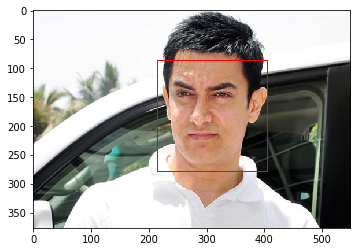

In [73]:
celeb_name = label_names[random.randint(0,3)]
c_num = random.randint(0,300)
print('Celeb Name', celeb_name)
print('Pic Num', c_num)
c_box =  get_celeb_box(df, celeb_name, c_num)
print(c_box)
c_url= get_celeb_url(df, celeb_name, c_num)
print(c_url)
bbox_on_img(c_url, c_box)

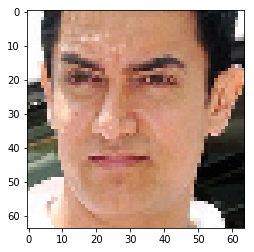

In [74]:
p_img = get_clip_image(c_url, c_box)
plt.figure()
plt.imshow(p_img)

In [75]:
class_num2, class_name2, confidence2, all_preds2 = predict(p_img)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'vgg-models/checkpoints-1e3x4-2e4-09202019', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1958c36a0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tens

In [76]:
print('Class_Num', class_num2)
print('Class_Name', class_name2)
print('Confidence', str(confidence2))
print(all_preds2)

print(label_names)

Class_Num 3
Class_Name Aamir_Khan
Confidence 336.5622
[ 56.250767 -25.873026 -36.103256 ... -38.856976  39.26296   72.01227 ]
['A', 'A', 'A_P_J_Abdul_Kalam', 'Aamir_Khan', 'Aaron_Staton', 'Aaron_Tveit', 'Aaron_Yoo', 'Abbie_Cornish', 'Abel_Ferrara', 'Abigail_Breslin', 'Abigail_Klein', 'Abigail_Spencer', 'Abraham_Benrubi', 'Adam_Baldwin', 'Adam_Beach', 'Adam_Brody', 'Adam_Buxton', 'Adam_Copeland', 'Adam_Driver', 'Adam_G', 'Adam_Garcia', 'Adam_Godley', 'Adam_Goldberg', 'Adam_Gregory', 'Adam_Hicks', 'Adam_Lambert', 'Adam_Levine', 'Adam_Rodriguez', 'Adelaide_Clemens', 'Adelaide_Kane', 'Adina_Porter', 'Aditya_Roy_Kapoor', 'Adrian_Grenier', 'Adrian_Paul', 'Adriana_Barraza', 'Adrianne_Curry', 'Adrianne_Palicki', 'Adrienne_Barbeau', 'Agyness_Deyn', 'Aida_Turturro', 'Aidan_Gillen', 'Aidan_Turner', 'Ajay_Devgn', 'Akshay_Kumar', 'Alain_Delon', 'Alan_Alda', 'Alan_Cumming', 'Alan_Dale', 'Alan_Ladd', 'Alan_Rickman', 'Alan_Tudyk', 'Alba_Rohrwacher', 'Aldis_Hodge', 'Alessandra_Torresani', 'Alex_Borstei